**Task 1: Combine CSV Files into a Single DataFrame**

---



In [1]:
import pandas as pd
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
directory = '/content/drive/MyDrive/data'
filenames = [
    'Tomatoes.csv',
    'Sorghum.csv',
    'Potatoes (Irish).csv',
    'Peas (fresh).csv',
    'Oranges (big size).csv',
    'Maize.csv',
    'Chili (red).csv',
    'Cassava.csv',
    'Beans (dry).csv'
]


In [12]:
df_list = []


In [15]:
for filename in filenames:
    file_path = os.path.join(directory, filename)
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)

        # Display columns for debugging
        print(f"\nProcessing {filename}")
        print(f"Columns: {df.columns.tolist()}")

        # Check if 'mp_year' and 'mp_month' exist
        if 'mp_year' not in df.columns or 'mp_month' not in df.columns:
            print(f"Columns 'mp_year' or 'mp_month' not found in {filename}.")
            continue

        # Convert 'mp_year' and 'mp_month' to numeric, handling errors
        df['mp_year'] = pd.to_numeric(df['mp_year'], errors='coerce')
        df['mp_month'] = pd.to_numeric(df['mp_month'], errors='coerce')

        # Drop rows where 'mp_year' or 'mp_month' is NaN
        df.dropna(subset=['mp_year', 'mp_month'], inplace=True)

        # Ensure 'mp_year' and 'mp_month' are integers
        df['mp_year'] = df['mp_year'].astype(int)
        df['mp_month'] = df['mp_month'].astype(int)

        # Rename 'mp_year' and 'mp_month' to 'year' and 'month' for date parsing
        df.rename(columns={'mp_year':'year', 'mp_month':'month'}, inplace=True)

        # Create a 'date' column
        df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1), errors='coerce')

        # Drop rows where 'date' is NaT
        df.dropna(subset=['date'], inplace=True)

        # Set 'date' as index
        df.set_index('date', inplace=True)

        # Extract the good name from the filename
        base_name = filename[:-4]
        good_name = base_name.strip()

        # Check if 'mp_price' exists
        if 'mp_price' not in df.columns:
            print(f"Column 'mp_price' not found in {filename}.")
            continue

        # Convert 'mp_price' to numeric, handling errors
        df['mp_price'] = pd.to_numeric(df['mp_price'], errors='coerce')

        # Drop rows where 'mp_price' is NaN
        df.dropna(subset=['mp_price'], inplace=True)

        # Group by 'date' and calculate the average 'mp_price'
        df_grouped = df.groupby('date')['mp_price'].mean().rename(good_name)

        # Append the Series to the list
        df_list.append(df_grouped)

    except Exception as e:
        print(f"An error occurred while processing {file_path}:")
        traceback.print_exc()  # Print the full traceback

# Check if df_list is empty
if not df_list:
    print("\nNo data was processed. The df_list is empty.")
else:
    # Combine all Series into a single DataFrame
    combined_df = pd.concat(df_list, axis=1)
    # Display the combined DataFrame
    print("\nCombined DataFrame:")
    print(combined_df)



Processing Tomatoes.csv
Columns: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']

Processing Sorghum.csv
Columns: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']

Processing Potatoes (Irish).csv
Columns: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']

Processing Peas (fresh).csv
Columns: ['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name', 'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id', 'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource']

Processing O

**Task 2: Explore the Consolidated Data**



In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [19]:
# Assuming 'combined_df' is your consolidated DataFrame
print("Shape of the DataFrame:", combined_df.shape)


Shape of the DataFrame: (96, 18)


In [20]:
print("\nColumn Names and Data Types:")
print(combined_df.dtypes)



Column Names and Data Types:
Tomatoes              float64
Sorghum               float64
Potatoes (Irish)      float64
Peas (fresh)          float64
Oranges (big size)    float64
Maize                 float64
Chili (red)           float64
Cassava               float64
Beans (dry)           float64
Tomatoes              float64
Sorghum               float64
Potatoes (Irish)      float64
Peas (fresh)          float64
Oranges (big size)    float64
Maize                 float64
Chili (red)           float64
Cassava               float64
Beans (dry)           float64
dtype: object


In [21]:
# Ensure the index is a DatetimeIndex
if not isinstance(combined_df.index, pd.DatetimeIndex):
    combined_df.index = pd.to_datetime(combined_df.index)

# Display the date range
print("\nDate Range:")
print("Start Date:", combined_df.index.min())
print("End Date:", combined_df.index.max())

# Check if the date index is continuous
date_range = pd.date_range(start=combined_df.index.min(), end=combined_df.index.max(), freq='MS')
is_continuous = combined_df.index.equals(date_range)

print("\nIs the date index continuous (monthly) without gaps?", is_continuous)



Date Range:
Start Date: 2008-01-01 00:00:00
End Date: 2015-12-01 00:00:00

Is the date index continuous (monthly) without gaps? True


In [22]:
print("\nMissing Values per Column:")
print(combined_df.isnull().sum())



Missing Values per Column:
Tomatoes              58
Sorghum                0
Potatoes (Irish)       0
Peas (fresh)          36
Oranges (big size)    58
Maize                  0
Chili (red)           58
Cassava                0
Beans (dry)            0
Tomatoes              58
Sorghum                0
Potatoes (Irish)       0
Peas (fresh)          36
Oranges (big size)    58
Maize                  0
Chili (red)           58
Cassava                0
Beans (dry)            0
dtype: int64


In [23]:
print("\nPercentage of Missing Values per Column:")
missing_percentage = combined_df.isnull().mean() * 100
print(missing_percentage)



Percentage of Missing Values per Column:
Tomatoes              60.416667
Sorghum                0.000000
Potatoes (Irish)       0.000000
Peas (fresh)          37.500000
Oranges (big size)    60.416667
Maize                  0.000000
Chili (red)           60.416667
Cassava                0.000000
Beans (dry)            0.000000
Tomatoes              60.416667
Sorghum                0.000000
Potatoes (Irish)       0.000000
Peas (fresh)          37.500000
Oranges (big size)    60.416667
Maize                  0.000000
Chili (red)           60.416667
Cassava                0.000000
Beans (dry)            0.000000
dtype: float64


In [24]:
print("\nDescriptive Statistics:")
summary_stats = combined_df.describe()
print(summary_stats)



Descriptive Statistics:
         Tomatoes     Sorghum  Potatoes (Irish)  Peas (fresh)  \
count   38.000000   96.000000         96.000000     60.000000   
mean   376.446175  275.130178        156.671755    922.292466   
std     56.819252   61.370135         35.260186    228.328475   
min    273.199820  164.921875         97.000000    553.885886   
25%    334.180228  228.739353        130.808064    734.679617   
50%    374.262788  258.348848        150.377180    875.390358   
75%    411.263391  332.083987        183.347528   1043.666008   
max    469.490286  388.809678        245.468424   1499.938600   

       Oranges (big size)       Maize  Chili (red)     Cassava  Beans (dry)  \
count           38.000000   96.000000    38.000000   96.000000    96.000000   
mean           583.524695  227.949904  1129.368683  195.969790   334.083819   
std             77.458279   41.577013   306.620568   35.205063    64.789260   
min            412.980904  145.820312   655.904309  130.102775   219.6975

In [25]:
# Calculating additional statistics
additional_stats = combined_df.agg(['mean', 'median', 'min', 'max', 'std'])
print("\nAdditional Summary Statistics:")
print(additional_stats)



Additional Summary Statistics:
          Tomatoes     Sorghum  Potatoes (Irish)  Peas (fresh)  \
mean    376.446175  275.130178        156.671755    922.292466   
median  374.262788  258.348848        150.377180    875.390358   
min     273.199820  164.921875         97.000000    553.885886   
max     469.490286  388.809678        245.468424   1499.938600   
std      56.819252   61.370135         35.260186    228.328475   

        Oranges (big size)       Maize  Chili (red)     Cassava  Beans (dry)  \
mean            583.524695  227.949904  1129.368683  195.969790   334.083819   
median          582.115439  225.736949  1056.904008  204.739094   327.908199   
min             412.980904  145.820312   655.904309  130.102775   219.697584   
max             726.086930  335.986608  1952.848602  260.887844   530.042987   
std              77.458279   41.577013   306.620568   35.205063    64.789260   

          Tomatoes     Sorghum  Potatoes (Irish)  Peas (fresh)  \
mean    376.446175  275.

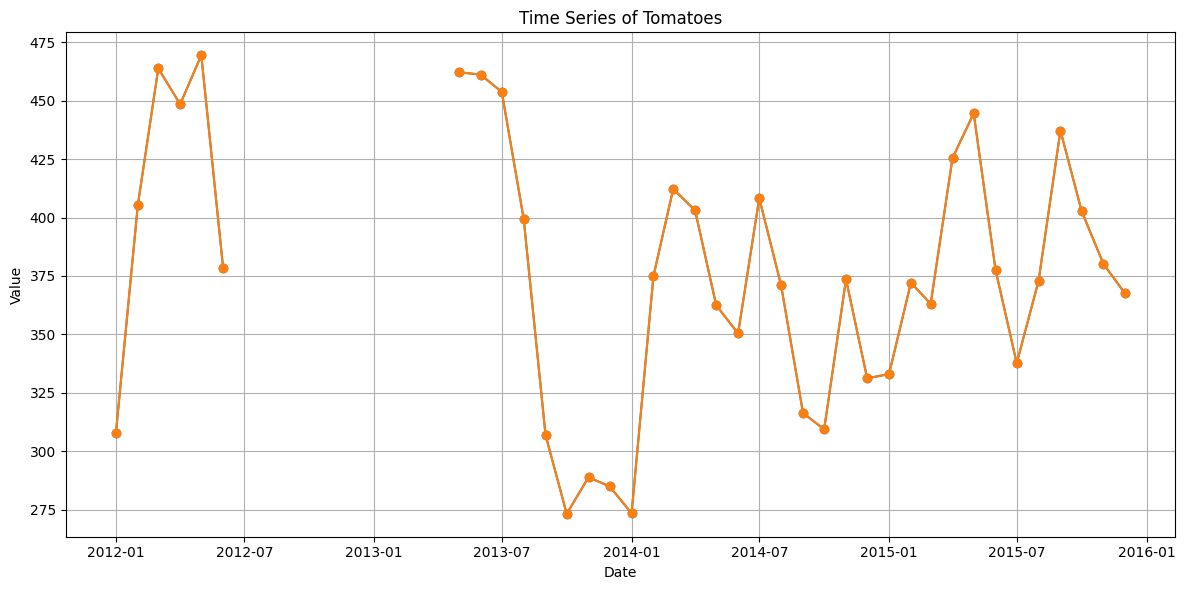

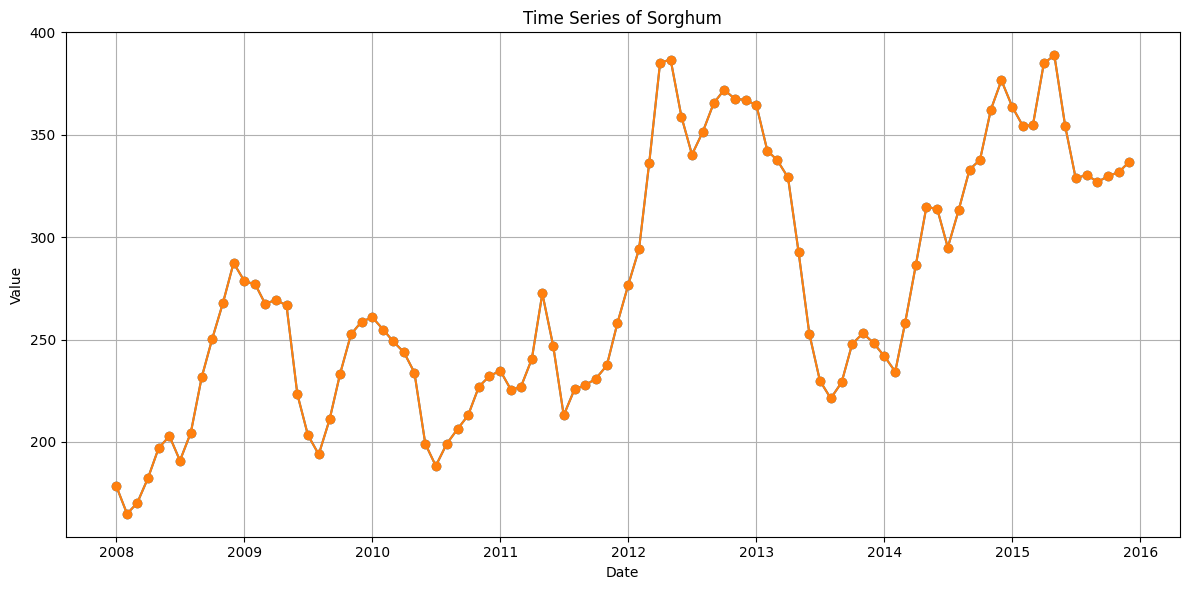

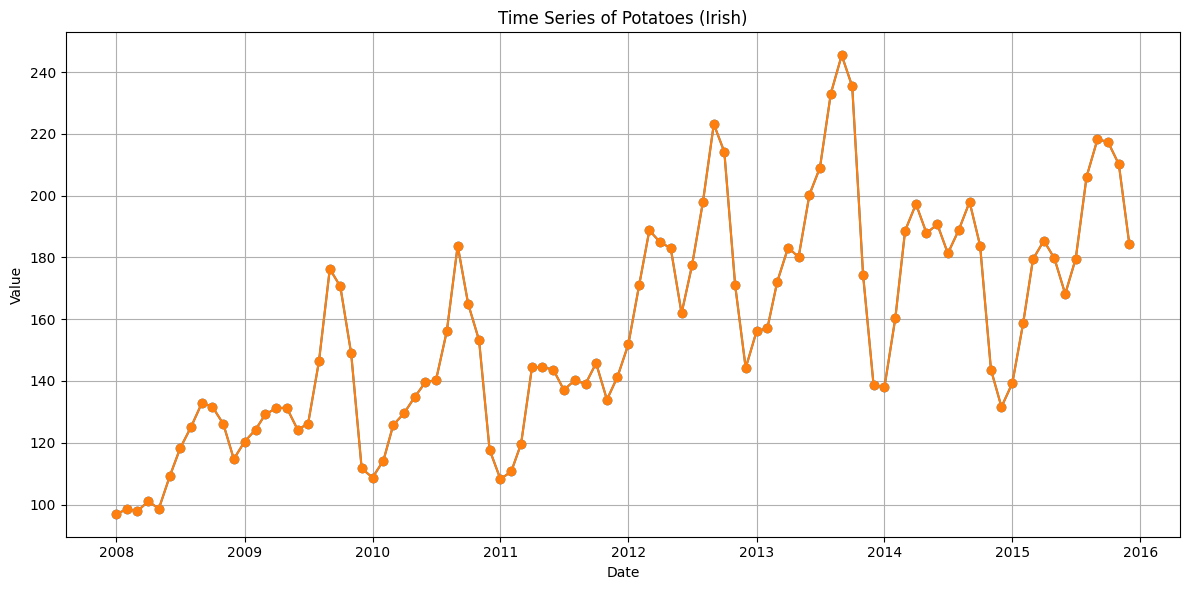

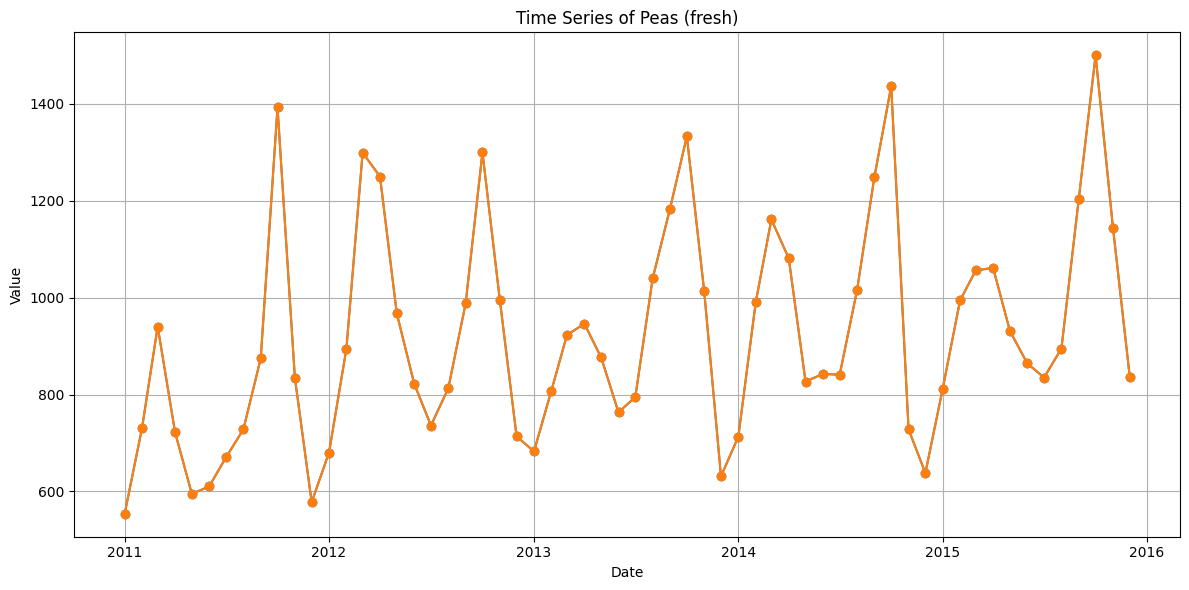

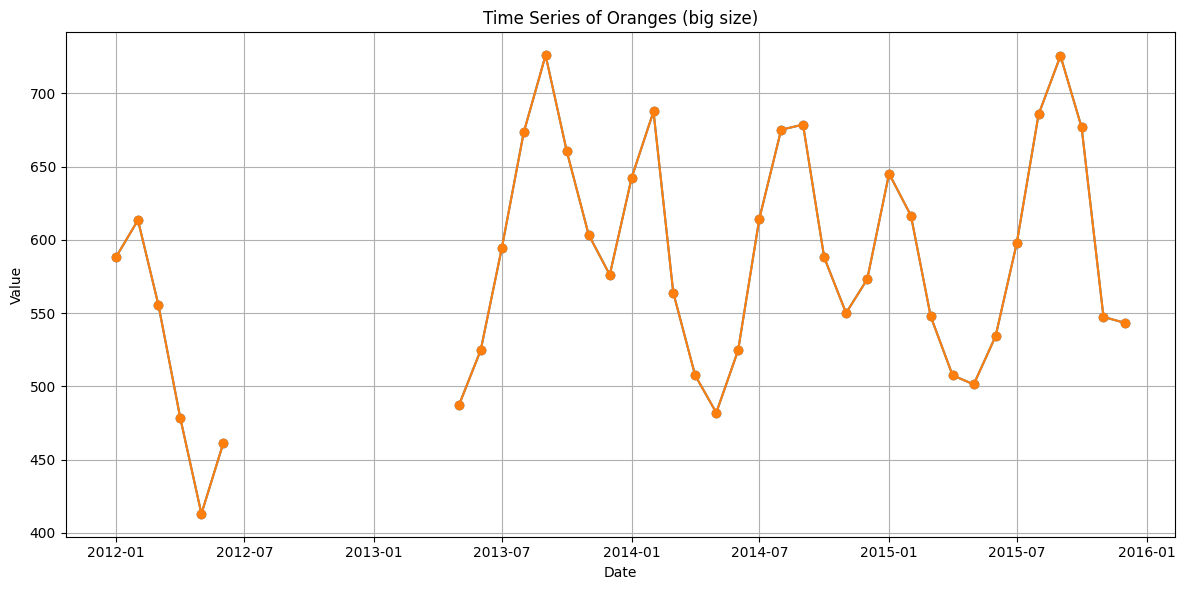

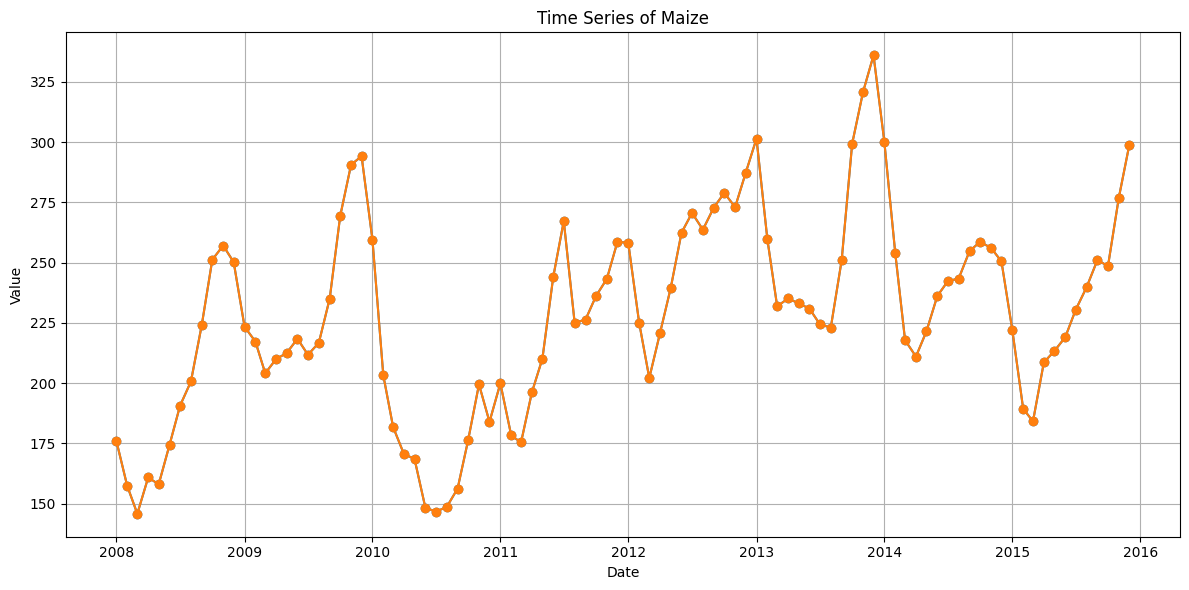

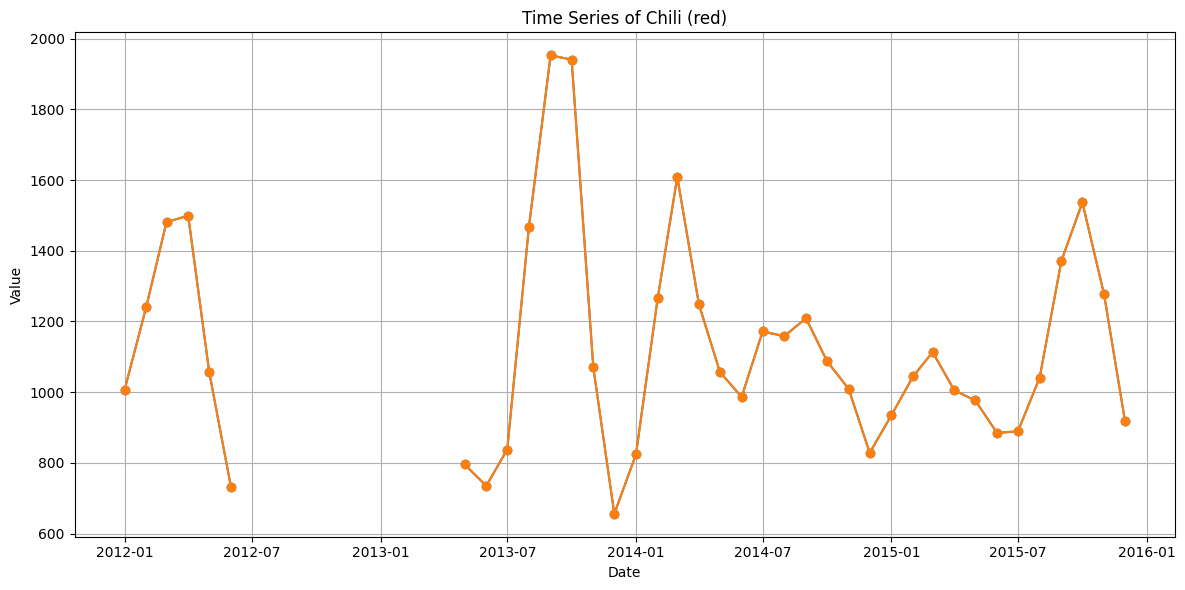

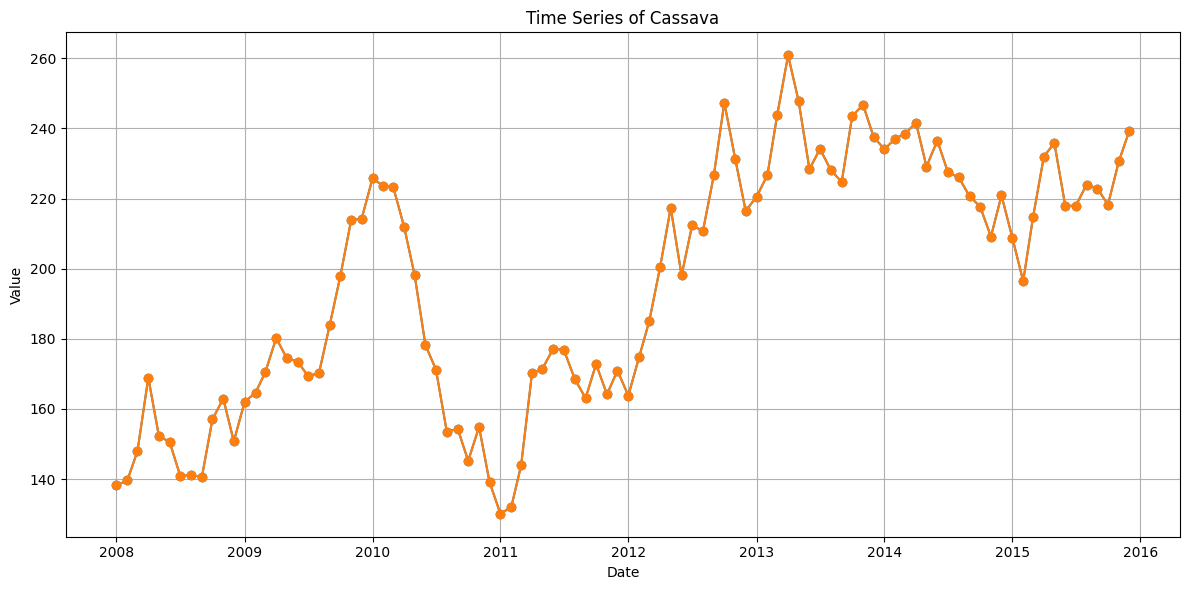

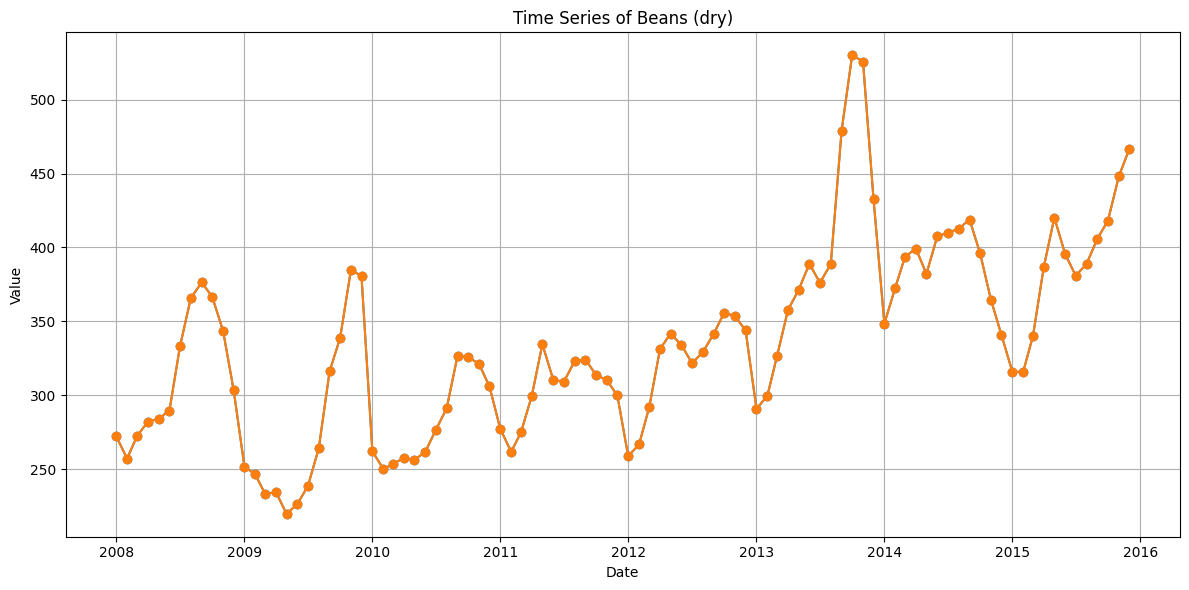

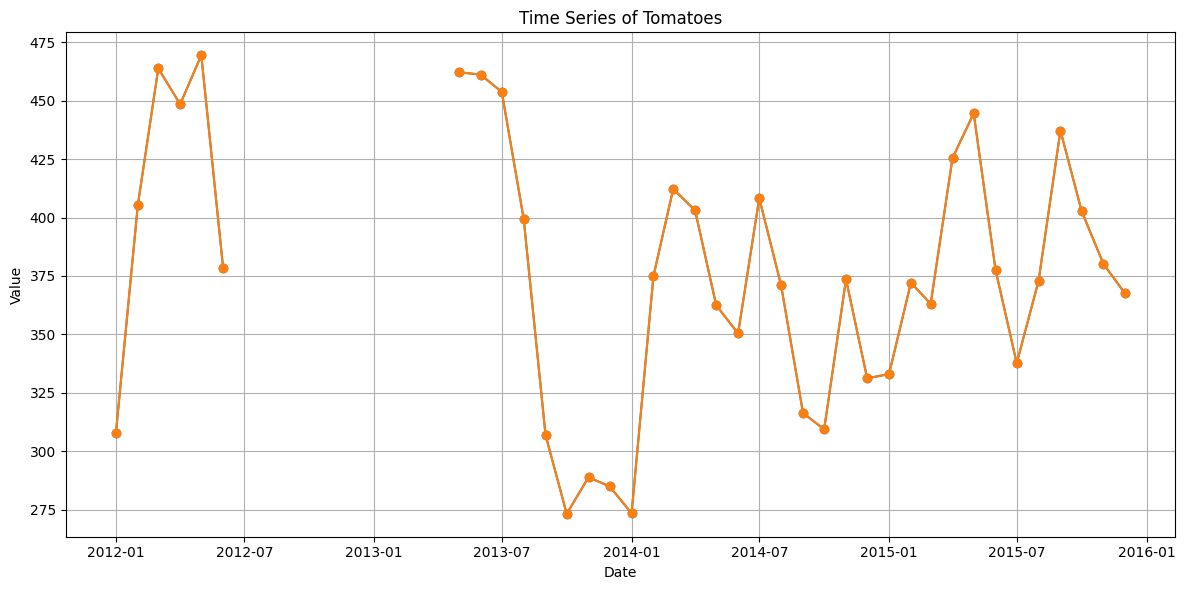

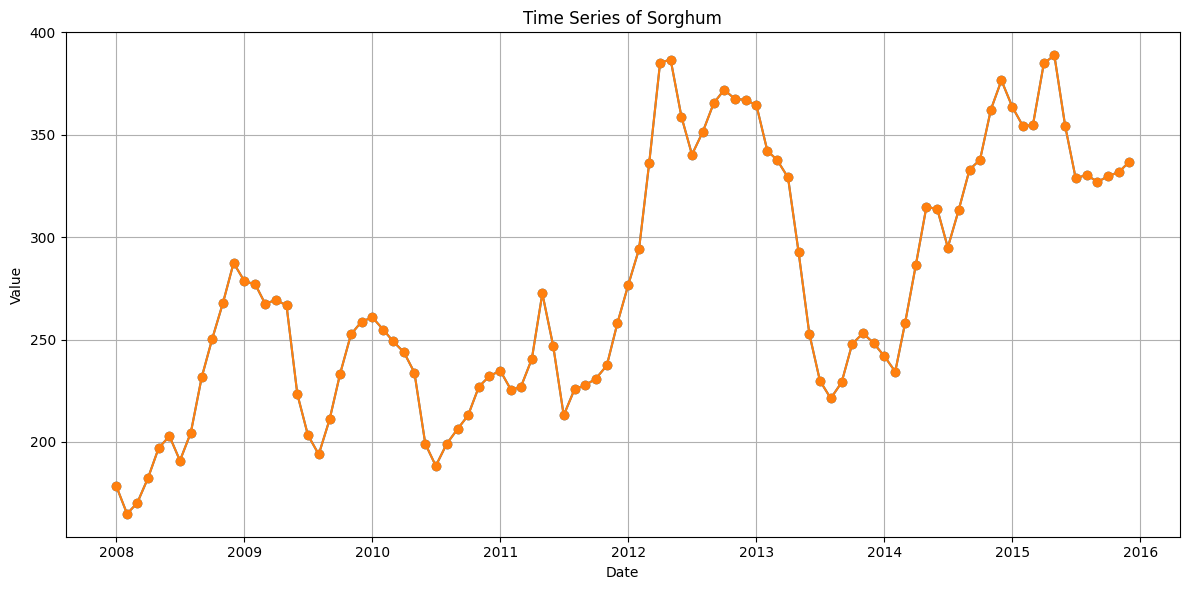

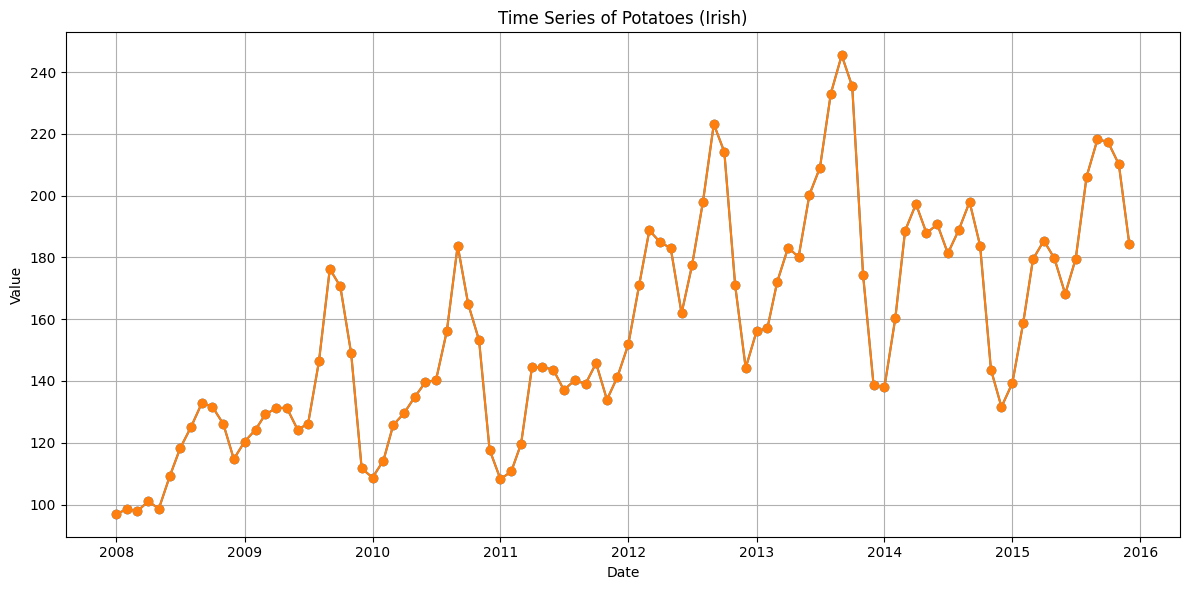

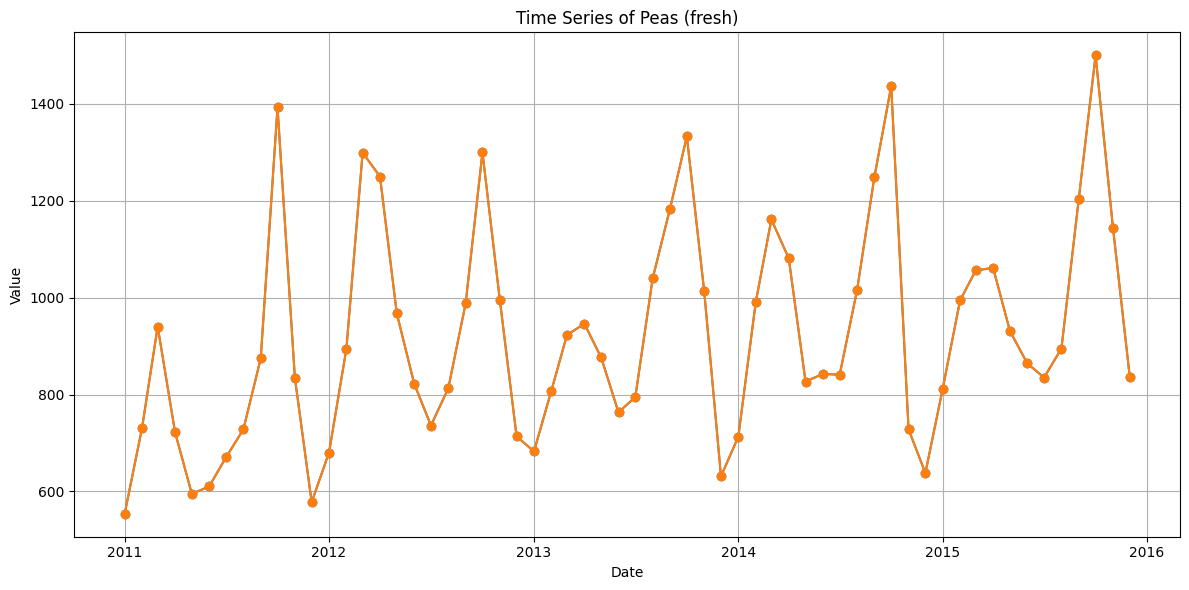

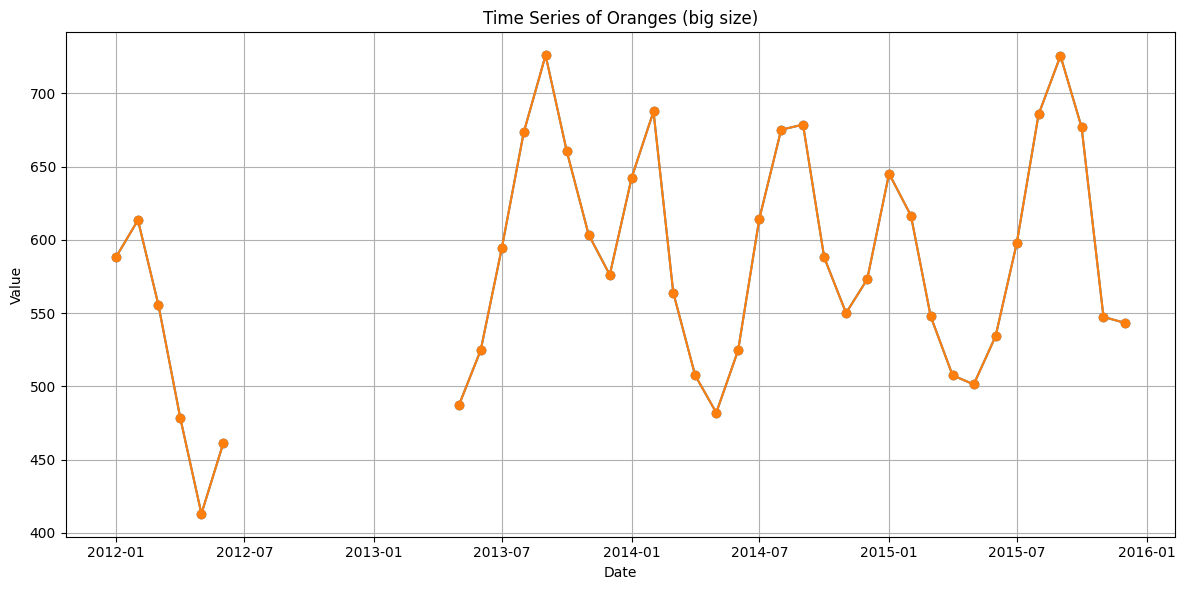

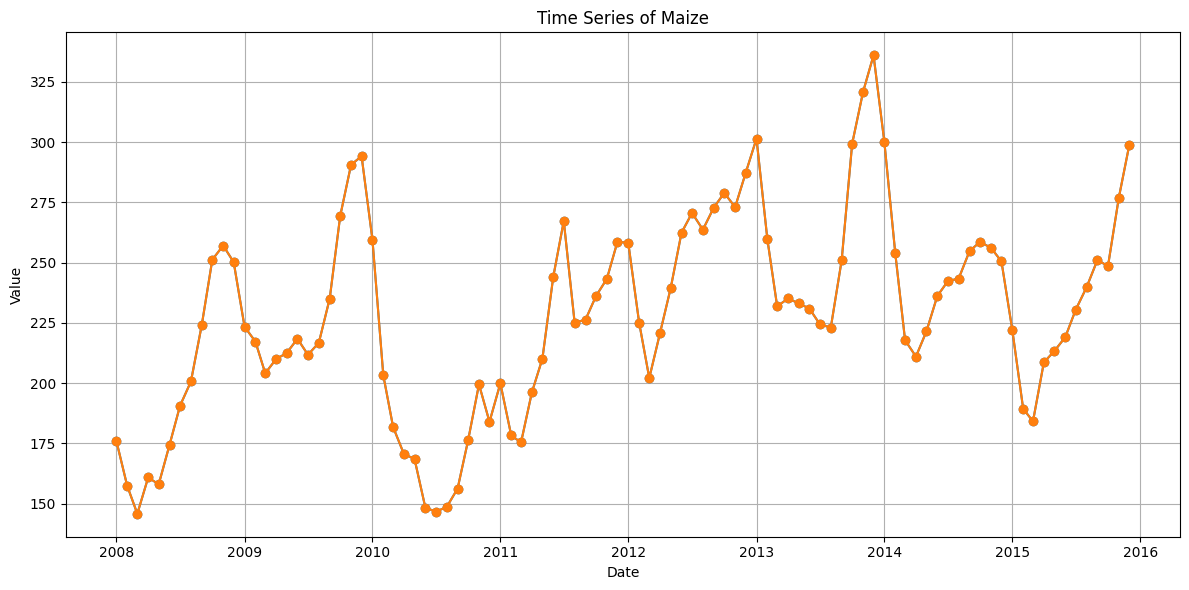

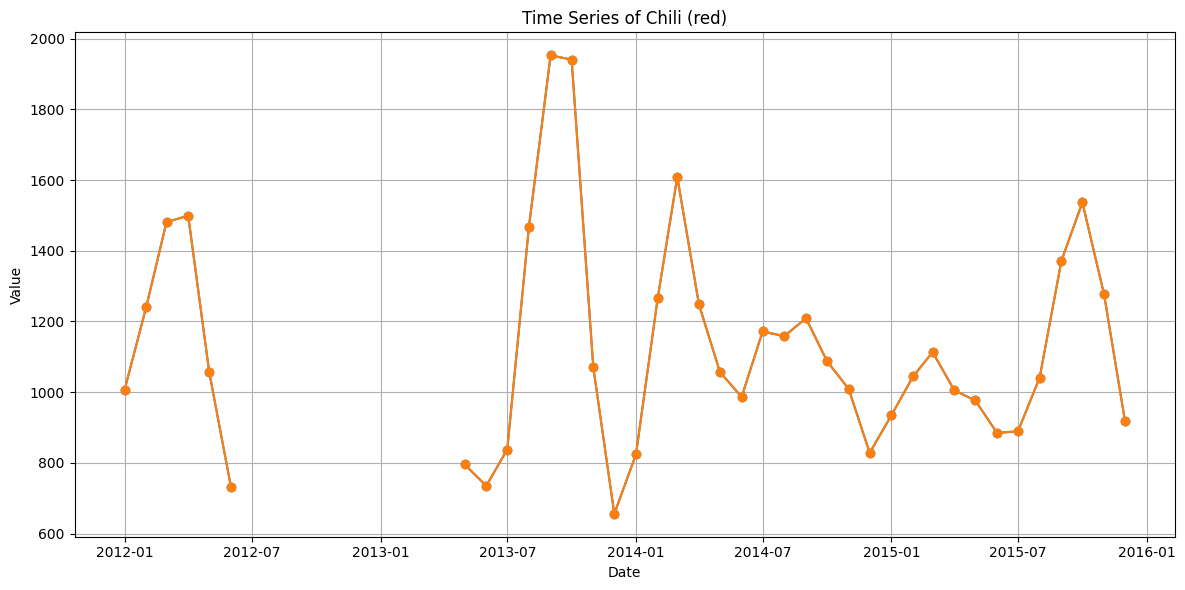

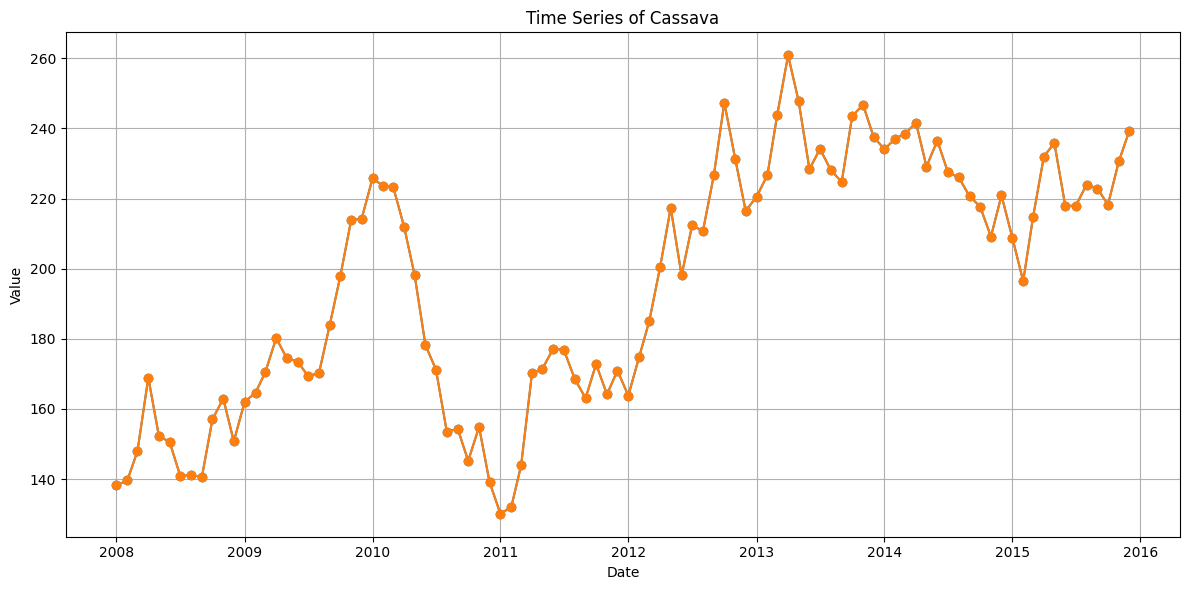

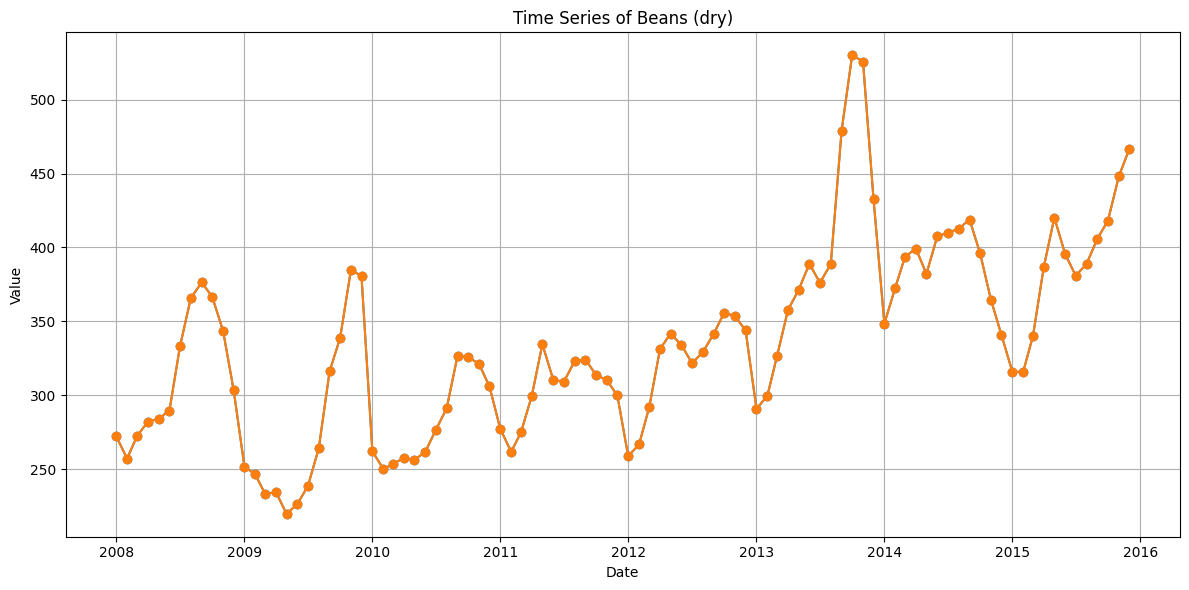

In [26]:
import matplotlib.dates as mdates

# Create a plot for each good
for column in combined_df.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(combined_df.index, combined_df[column], marker='o')
    plt.title(f"Time Series of {column}")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


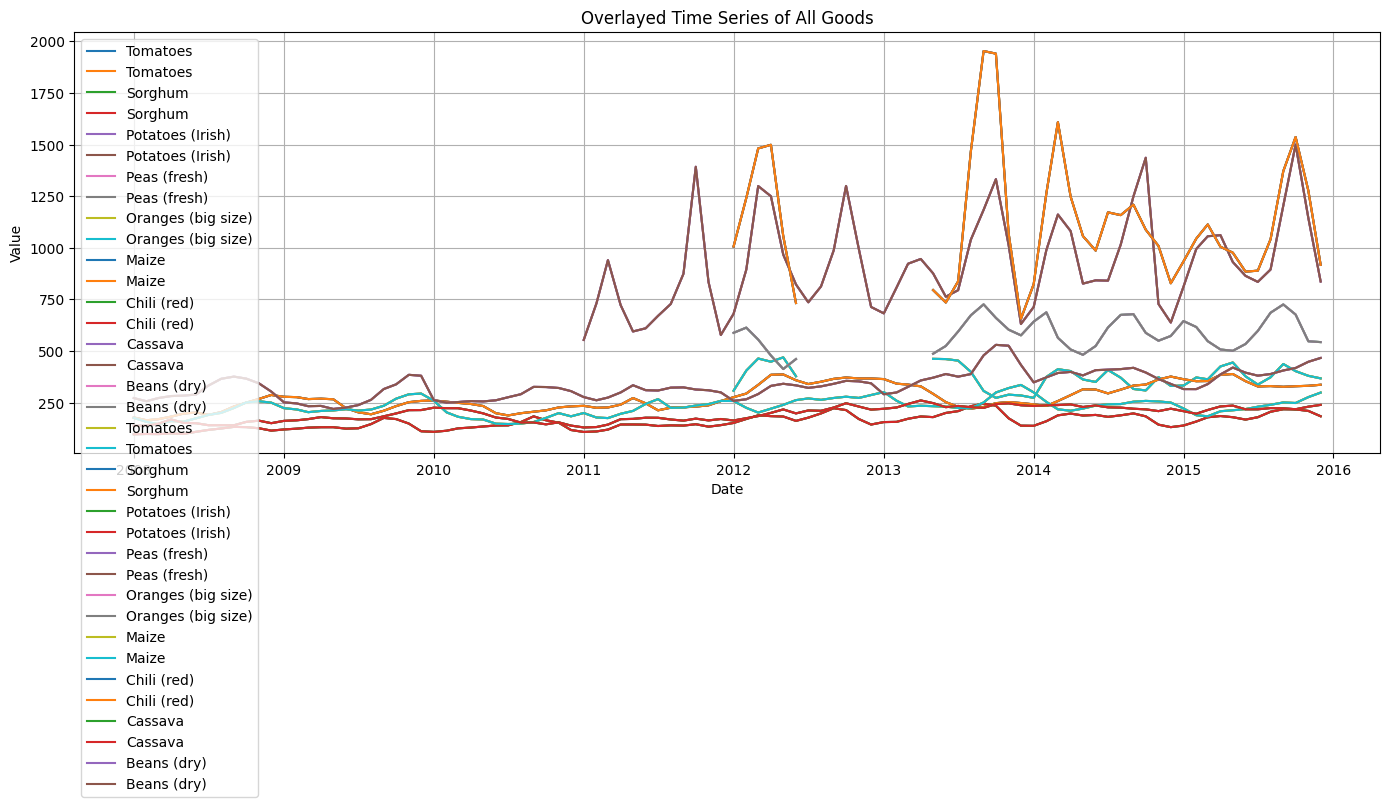

In [27]:
plt.figure(figsize=(14, 7))

for column in combined_df.columns:
    plt.plot(combined_df.index, combined_df[column], label=column)

plt.title("Overlayed Time Series of All Goods")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Task 3: Handle Missing Values**

In [30]:
# Identify columns with missing values and count missing entries
missing_values = combined_df.isnull().sum()

print("Missing Values per Column:")
print(missing_values)


Missing Values per Column:
Tomatoes              58
Sorghum                0
Potatoes (Irish)       0
Peas (fresh)          36
Oranges (big size)    58
Maize                  0
Chili (red)           58
Cassava                0
Beans (dry)            0
Tomatoes              58
Sorghum                0
Potatoes (Irish)       0
Peas (fresh)          36
Oranges (big size)    58
Maize                  0
Chili (red)           58
Cassava                0
Beans (dry)            0
dtype: int64


In [31]:
# Calculate the percentage of missing values per column
missing_percentage = combined_df.isnull().mean() * 100

print("\nPercentage of Missing Values per Column:")
print(missing_percentage)



Percentage of Missing Values per Column:
Tomatoes              60.416667
Sorghum                0.000000
Potatoes (Irish)       0.000000
Peas (fresh)          37.500000
Oranges (big size)    60.416667
Maize                  0.000000
Chili (red)           60.416667
Cassava                0.000000
Beans (dry)            0.000000
Tomatoes              60.416667
Sorghum                0.000000
Potatoes (Irish)       0.000000
Peas (fresh)          37.500000
Oranges (big size)    60.416667
Maize                  0.000000
Chili (red)           60.416667
Cassava                0.000000
Beans (dry)            0.000000
dtype: float64


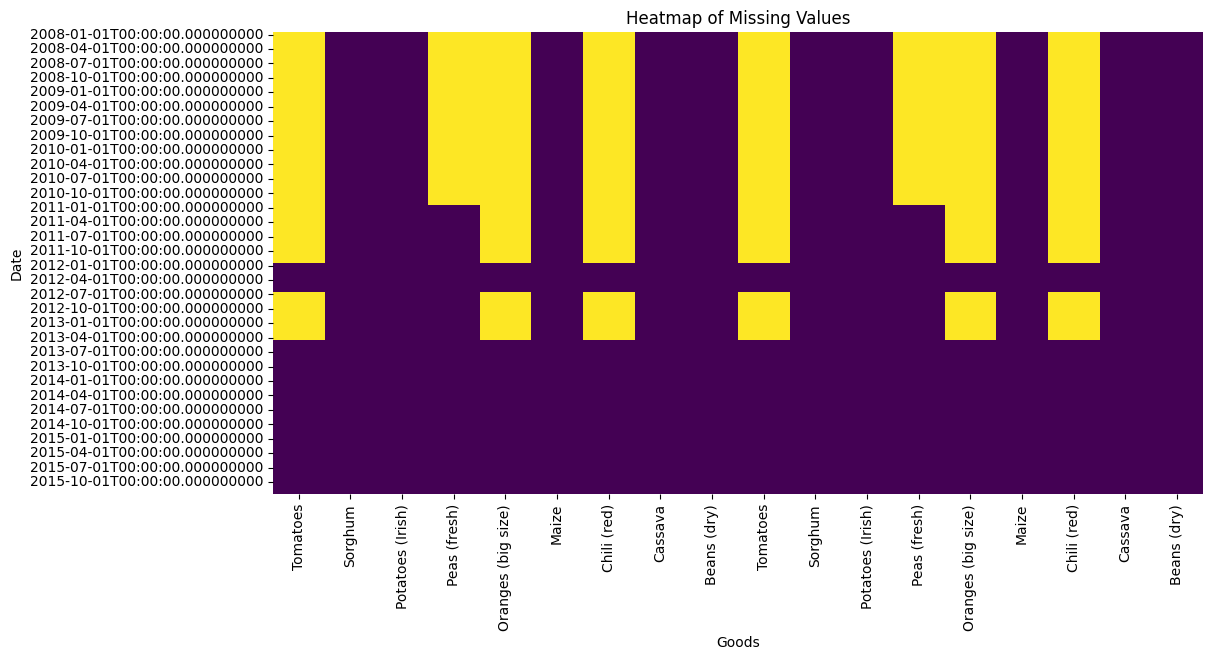

In [32]:
# Visualize missing data pattern using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(combined_df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values")
plt.xlabel("Goods")
plt.ylabel("Date")
plt.show()


In [33]:
# Apply linear interpolation
combined_df_interpolated = combined_df.interpolate(method='linear')

# Verify if all missing values have been filled
remaining_missing = combined_df_interpolated.isnull().sum()

print("\nMissing Values After Linear Interpolation:")
print(remaining_missing)



Missing Values After Linear Interpolation:
Tomatoes              48
Sorghum                0
Potatoes (Irish)       0
Peas (fresh)          36
Oranges (big size)    48
Maize                  0
Chili (red)           48
Cassava                0
Beans (dry)            0
Tomatoes              48
Sorghum                0
Potatoes (Irish)       0
Peas (fresh)          36
Oranges (big size)    48
Maize                  0
Chili (red)           48
Cassava                0
Beans (dry)            0
dtype: int64


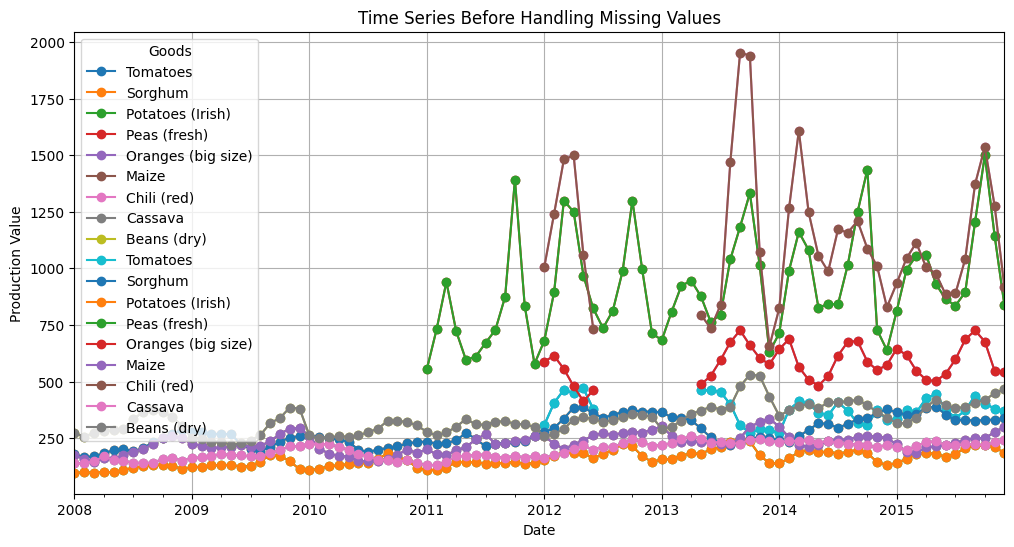

In [34]:
# Plotting original data with missing values
combined_df.plot(figsize=(12, 6), marker='o', linestyle='-')
plt.title("Time Series Before Handling Missing Values")
plt.xlabel("Date")
plt.ylabel("Production Value")
plt.legend(title="Goods")
plt.grid(True)
plt.show()


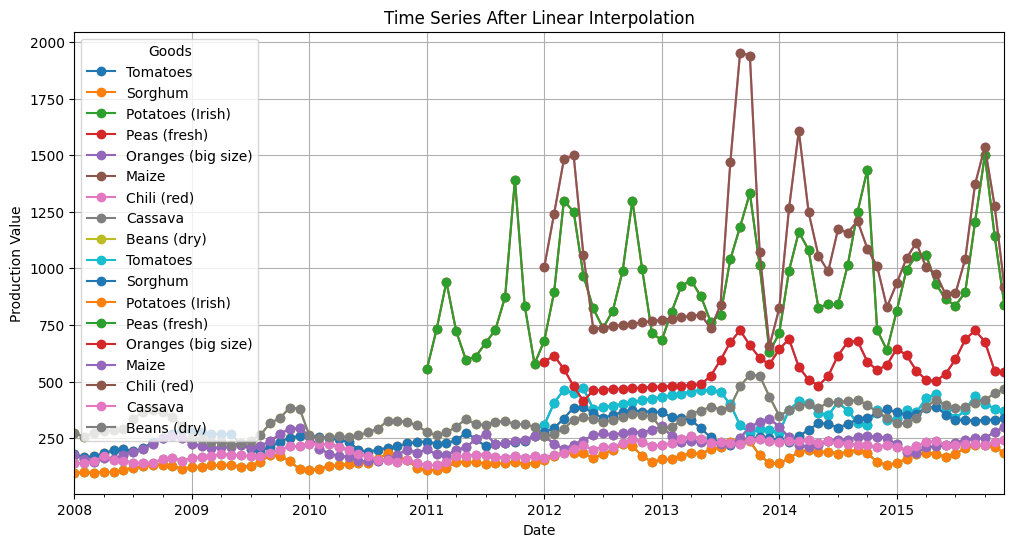

In [35]:
# Plotting data after interpolation
combined_df_interpolated.plot(figsize=(12, 6), marker='o', linestyle='-')
plt.title("Time Series After Linear Interpolation")
plt.xlabel("Date")
plt.ylabel("Production Value")
plt.legend(title="Goods")
plt.grid(True)
plt.show()


In [36]:
# Update the combined DataFrame
combined_df = combined_df_interpolated.copy()


**Task 4: Analyze Similarities Between Products**

In [37]:
# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    Tomatoes   Sorghum  Potatoes (Irish)  Peas (fresh)  \
Tomatoes            1.000000  0.336488          0.138680      0.034988   
Sorghum             0.336488  1.000000          0.494535      0.193538   
Potatoes (Irish)    0.138680  0.494535          1.000000      0.630224   
Peas (fresh)        0.034988  0.193538          0.630224      1.000000   
Oranges (big size) -0.492339 -0.540331          0.242386      0.289842   
Maize              -0.434736  0.458661          0.382097     -0.032856   
Chili (red)        -0.165177 -0.360287          0.554789      0.684177   
Cassava             0.048365  0.609231          0.669918      0.323437   
Beans (dry)        -0.387087  0.333250          0.684833      0.418628   
Tomatoes            1.000000  0.336488          0.138680      0.034988   
Sorghum             0.336488  1.000000          0.494535      0.193538   
Potatoes (Irish)    0.138680  0.494535          1.000000      0.630224   
Peas (fresh)      

Duplicate columns after adjustment: Index([], dtype='object')

Top Correlations Between Goods:
Peas_fresh      Chili_red         0.755513
Chili_red       Peas_fresh        0.755513
Beans_dry       Potatoes_Irish    0.684833
Potatoes_Irish  Beans_dry         0.684833
                Cassava           0.669918
dtype: float64

The pair of goods with the highest correlation is: ('Peas_fresh', 'Chili_red')
Correlation coefficient: 0.7555


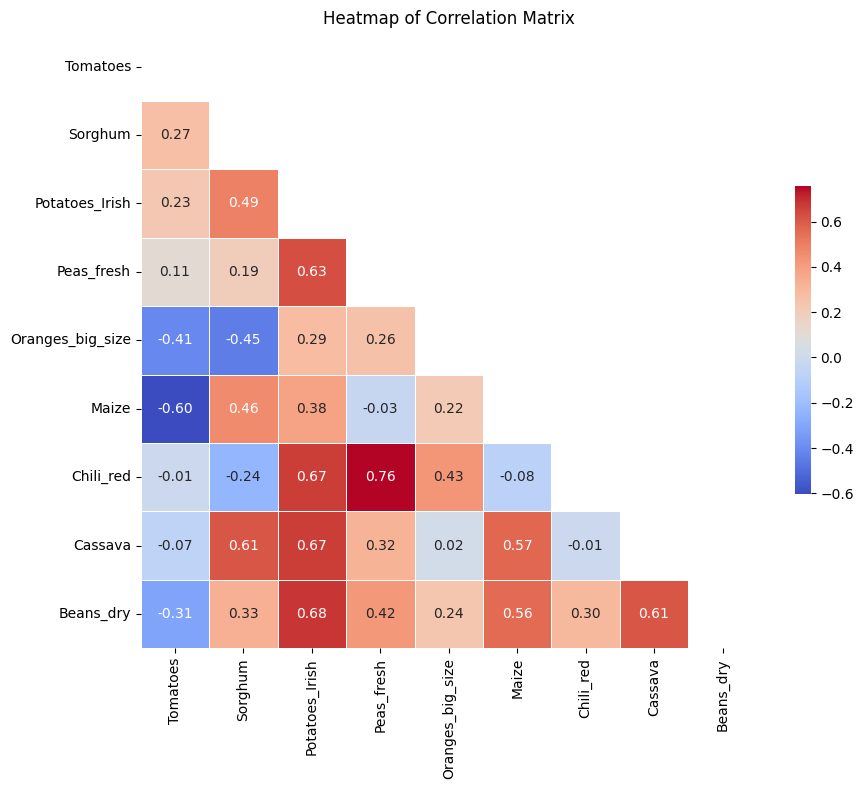

In [40]:
import pandas as pd
import os
import traceback
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Directory where your CSV files are located
directory = '/content/drive/MyDrive/data'  # Replace with your actual path

filenames = [
    'Tomatoes.csv',
    'Sorghum.csv',
    'Potatoes (Irish).csv',
    'Peas (fresh).csv',
    'Oranges (big size).csv',
    'Maize.csv',
    'Chili (red).csv',
    'Cassava.csv',
    'Beans (dry).csv'
]

df_list = []

for filename in filenames:
    file_path = os.path.join(directory, filename)
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)
        # ... (data processing steps)

        # Extract the good name, ensuring uniqueness
        base_name = filename[:-4]
        good_name = base_name.strip().replace(' ', '_').replace('(', '').replace(')', '')
        # Example: "Potatoes (Irish)" becomes "Potatoes_Irish"

        # Proceed with processing
        # ... (rest of the code)
        df['mp_year'] = pd.to_numeric(df['mp_year'], errors='coerce')
        df['mp_month'] = pd.to_numeric(df['mp_month'], errors='coerce')
        df.dropna(subset=['mp_year', 'mp_month'], inplace=True)
        df['mp_year'] = df['mp_year'].astype(int)
        df['mp_month'] = df['mp_month'].astype(int)
        df.rename(columns={'mp_year':'year', 'mp_month':'month'}, inplace=True)
        df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1), errors='coerce')
        df.dropna(subset=['date'], inplace=True)
        df.set_index('date', inplace=True)
        if 'mp_price' not in df.columns:
            print(f"Column 'mp_price' not found in {filename}.")
            continue
        df['mp_price'] = pd.to_numeric(df['mp_price'], errors='coerce')
        df.dropna(subset=['mp_price'], inplace=True)
        df_grouped = df.groupby('date')['mp_price'].mean().rename(good_name)
        df_list.append(df_grouped)

    except Exception as e:
        print(f"An error occurred while processing {file_path}:")
        traceback.print_exc()

# Combine all Series into a single DataFrame
combined_df = pd.concat(df_list, axis=1)

# Verify that there are no duplicate columns
duplicate_columns = combined_df.columns[combined_df.columns.duplicated()].unique()
print("Duplicate columns after adjustment:", duplicate_columns)

# Proceed with the correlation analysis
correlation_matrix = combined_df.corr()

# Unstack the correlation matrix
corr_unstacked = correlation_matrix.unstack()
corr_unstacked = corr_unstacked[corr_unstacked.index.get_level_values(0) != corr_unstacked.index.get_level_values(1)]
sorted_correlations = corr_unstacked.sort_values(ascending=False)

print("\nTop Correlations Between Goods:")
print(sorted_correlations.head())

most_similar_pair = sorted_correlations.idxmax()
highest_correlation = sorted_correlations.max()

print(f"\nThe pair of goods with the highest correlation is: {most_similar_pair}")
print(f"Correlation coefficient: {highest_correlation:.4f}")

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)
plt.title("Heatmap of Correlation Matrix")
plt.show()


**Task 5: Forecasting for the Next 6 Months**

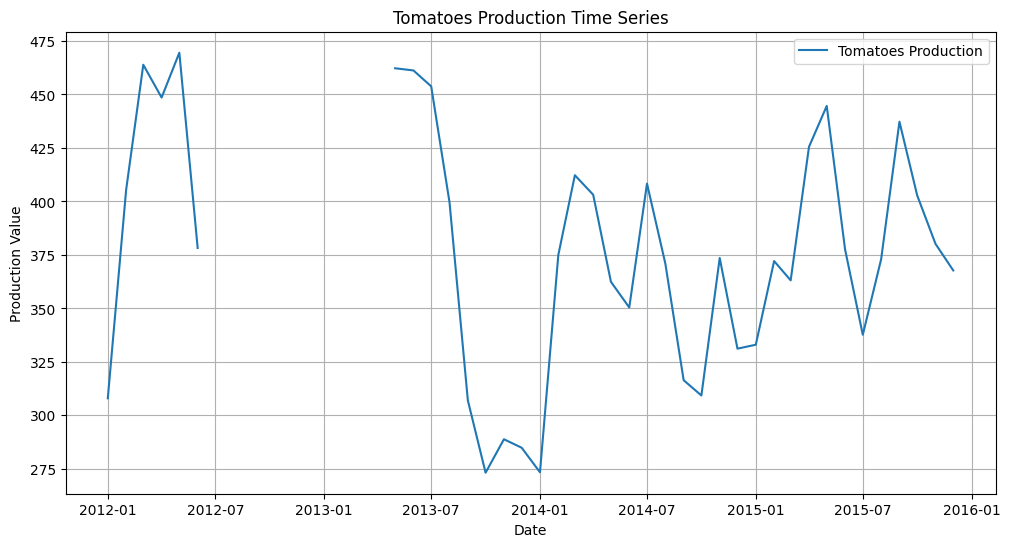

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure 'combined_df' is available and contains the 'Tomatoes' column
if 'Tomatoes' not in combined_df.columns:
    print("The 'Tomatoes' column is not in the DataFrame.")
else:
    # Extract the 'Tomatoes' time series
    tomatoes_ts = combined_df['Tomatoes']

    # Plot the original time series
    plt.figure(figsize=(12, 6))
    plt.plot(tomatoes_ts, label='Tomatoes Production')
    plt.title('Tomatoes Production Time Series')
    plt.xlabel('Date')
    plt.ylabel('Production Value')
    plt.legend()
    plt.grid(True)
    plt.show()


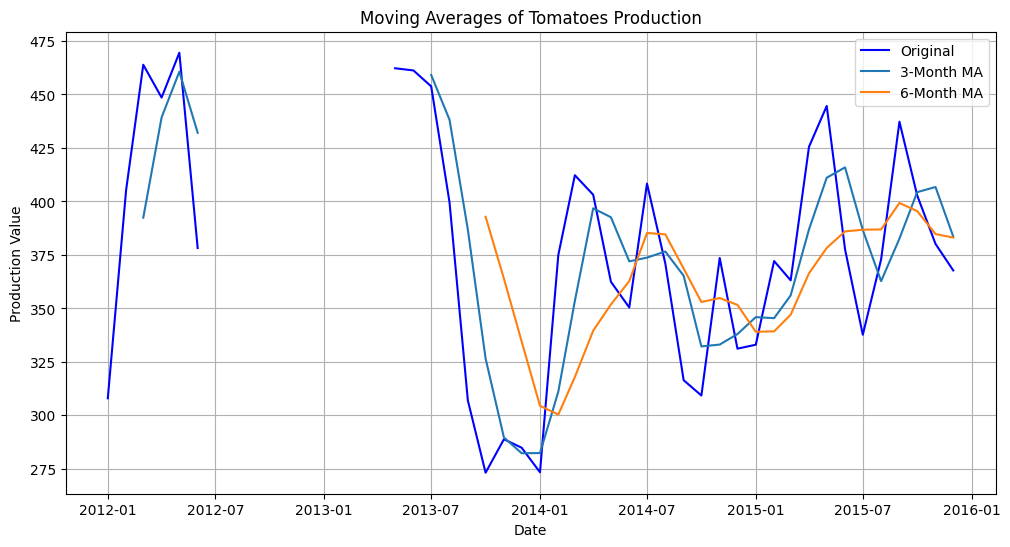

In [42]:
# Calculate moving averages
window_sizes = [3, 6]
moving_averages = {}

plt.figure(figsize=(12, 6))
plt.plot(tomatoes_ts, label='Original', color='blue')

for window in window_sizes:
    ma = tomatoes_ts.rolling(window=window).mean()
    moving_averages[window] = ma
    plt.plot(ma, label=f'{window}-Month MA')

plt.title('Moving Averages of Tomatoes Production')
plt.xlabel('Date')
plt.ylabel('Production Value')
plt.legend()
plt.grid(True)
plt.show()


In [43]:
# Forecast the next 6 months using the last value of the moving average
from pandas.tseries.offsets import DateOffset

last_date = tomatoes_ts.index[-1]
future_dates = [last_date + DateOffset(months=i) for i in range(1, 7)]

# Create a DataFrame to hold forecasts
ma_forecasts = pd.DataFrame(index=future_dates)

for window in window_sizes:
    last_ma_value = moving_averages[window].iloc[-1]
    ma_forecasts[f'{window}-Month MA Forecast'] = [last_ma_value] * 6

print("Moving Average Forecasts:")
print(ma_forecasts)


Moving Average Forecasts:
            3-Month MA Forecast  6-Month MA Forecast
2016-01-01           383.557778           383.090904
2016-02-01           383.557778           383.090904
2016-03-01           383.557778           383.090904
2016-04-01           383.557778           383.090904
2016-05-01           383.557778           383.090904
2016-06-01           383.557778           383.090904


In [49]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [52]:
# Check the length of the time series
print("Length of tomatoes_ts:", len(tomatoes_ts))


Length of tomatoes_ts: 96


In [53]:
# Check for NaN values
print("Number of NaN values in tomatoes_ts:", tomatoes_ts.isna().sum())


Number of NaN values in tomatoes_ts: 58


In [54]:
# Check data type
print("Data type of tomatoes_ts:", tomatoes_ts.dtypes)

# Check index type
print("Index type of tomatoes_ts:", type(tomatoes_ts.index))


Data type of tomatoes_ts: float64
Index type of tomatoes_ts: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [55]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(tomatoes_ts).fit()

# Forecast the next 6 months
ses_forecast = ses_model.forecast(steps=6)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [56]:
print(hw_model.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Tomatoes   No. Observations:                   96
Model:             ExponentialSmoothing   SSE                                nan
Optimized:                         True   AIC                                nan
Trend:                         Additive   BIC                                nan
Seasonal:                      Additive   AICC                               nan
Seasonal Periods:                    12   Date:                 Tue, 26 Nov 2024
Box-Cox:                          False   Time:                         01:16:03
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0050000                alpha                 True
smoothing_trend          

In [74]:
# Remove initial NaN values
tomatoes_ts = tomatoes_ts[tomatoes_ts.first_valid_index():]

# Check for remaining NaN values
total_nans = tomatoes_ts.isna().sum()
print("Total NaN values after removing initial NaNs:", total_nans)


Total NaN values after removing initial NaNs: 0


In [75]:
# Interpolate remaining missing values
tomatoes_ts = tomatoes_ts.interpolate(method='linear')

# Confirm no NaN values remain
total_nans_after = tomatoes_ts.isna().sum()
print("Total NaN values after interpolation:", total_nans_after)


Total NaN values after interpolation: 0


In [76]:
# Ensure index is a DatetimeIndex and sorted
tomatoes_ts.index = pd.to_datetime(tomatoes_ts.index)
tomatoes_ts = tomatoes_ts.sort_index()

# Set frequency to monthly ('MS' stands for Month Start)
tomatoes_ts = tomatoes_ts.asfreq('MS')

# Reindex to ensure no missing dates within the series
full_index = pd.date_range(start=tomatoes_ts.index.min(), end=tomatoes_ts.index.max(), freq='MS')
tomatoes_ts = tomatoes_ts.reindex(full_index)

# Interpolate any new missing values after reindexing
tomatoes_ts = tomatoes_ts.interpolate(method='linear')

# Ensure data type is float
tomatoes_ts = tomatoes_ts.astype(float)

# Confirm no NaN values
print("Total NaN values after reindexing and interpolation:", tomatoes_ts.isna().sum())


Total NaN values after reindexing and interpolation: 0


In [77]:
print("First 15 observations of tomatoes_ts after cleaning:")
print(tomatoes_ts.head(15))


First 15 observations of tomatoes_ts after cleaning:
2012-01-01    307.993524
2012-02-01    405.357463
2012-03-01    463.865029
2012-04-01    448.533915
2012-05-01    469.490286
2012-06-01    378.224845
2012-07-01    385.861258
2012-08-01    393.497672
2012-09-01    401.134086
2012-10-01    408.770500
2012-11-01    416.406914
2012-12-01    424.043327
2013-01-01    431.679741
2013-02-01    439.316155
2013-03-01    446.952569
Freq: MS, Name: Tomatoes, dtype: float64


In [78]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

try:
    hw_model = ExponentialSmoothing(
        tomatoes_ts,
        trend='add',
        seasonal='add',
        seasonal_periods=12
    ).fit()
except ValueError as e:
    print("Error fitting model with seasonality:", e)
    print("Trying without seasonality.")
    hw_model = ExponentialSmoothing(
        tomatoes_ts,
        trend='add',
        seasonal=None
    ).fit()

# Forecast the next 6 months
hw_forecast = hw_model.forecast(steps=6)
hw_forecast_series = pd.Series(hw_forecast, index=future_dates)

print("\nHolt-Winters Forecast:")
print(hw_forecast_series)



Holt-Winters Forecast:
2016-01-01    366.673142
2016-02-01    427.265334
2016-03-01    451.592635
2016-04-01    462.798472
2016-05-01    464.947588
2016-06-01    422.321758
dtype: float64


In [86]:
# Install Prophet if not already installed
!pip install prophet


In [87]:
from prophet import Prophet


In [89]:
# Check for duplicate dates
duplicate_dates = df_prophet[df_prophet.duplicated(subset=['ds'], keep=False)]

if not duplicate_dates.empty:
    print("Duplicate dates found:")
    print(duplicate_dates)
else:
    print("No duplicate dates found.")


No duplicate dates found.


In [91]:
# Ensure the index in combined_df_interpolated has a name
combined_df_interpolated.index.name = 'date'

# Choose the good to forecast
good_to_forecast = 'Tomatoes'

# Prepare the data
df_prophet = combined_df_interpolated[[good_to_forecast]].reset_index()

# Check columns after reset_index
print("Columns after reset_index:")
print(df_prophet.columns.tolist())

# Correctly rename columns
df_prophet.rename(columns={'date': 'ds', good_to_forecast: 'y'}, inplace=True)

# Check columns after renaming
print("Columns after renaming:")
print(df_prophet.columns.tolist())

# Check for duplicate column names
duplicate_columns = df_prophet.columns[df_prophet.columns.duplicated()]
if len(duplicate_columns) > 0:
    print("Duplicate column names found:", duplicate_columns.tolist())
    # Remove duplicate columns
    df_prophet = df_prophet.loc[:, ~df_prophet.columns.duplicated()]
    print("Columns after removing duplicates:")
    print(df_prophet.columns.tolist())
else:
    print("No duplicate column names in df_prophet.")

# Ensure 'ds' is datetime and 'y' is numeric
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], errors='coerce')
df_prophet['y'] = pd.to_numeric(df_prophet['y'], errors='coerce')

# Drop rows with missing values
df_prophet.dropna(subset=['ds', 'y'], inplace=True)

# Reset index
df_prophet.reset_index(drop=True, inplace=True)

# Verify the types
print("\nData types in df_prophet:")
print(df_prophet.dtypes)

# Proceed to fit the model
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)

# Continue with forecasting as previously described


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvp4xc518/kym5p_s7.json


Columns after reset_index:
['date', 'Tomatoes', 'Tomatoes']
Columns after renaming:
['ds', 'y', 'y']
Duplicate column names found: ['y']
Columns after removing duplicates:
['ds', 'y']

Data types in df_prophet:
ds    datetime64[ns]
y            float64
dtype: object


DEBUG:cmdstanpy:input tempfile: /tmp/tmpvp4xc518/5fq3dgpw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25794', 'data', 'file=/tmp/tmpvp4xc518/kym5p_s7.json', 'init=/tmp/tmpvp4xc518/5fq3dgpw.json', 'output', 'file=/tmp/tmpvp4xc518/prophet_model7hudsww5/prophet_model-20241126014625.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:46:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:46:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [93]:
# Select the good to forecast
good_to_forecast = 'Tomatoes'


In [94]:
# Ensure the index has a name 'date'
combined_df_interpolated.index.name = 'date'

# Reset the index to turn the date index into a column
df_prophet = combined_df_interpolated.reset_index()

# Rename the columns to 'ds' and 'y' as required by Prophet
df_prophet.rename(columns={'date': 'ds', good_to_forecast: 'y'}, inplace=True)

# Keep only the 'ds' and 'y' columns
df_prophet = df_prophet[['ds', 'y']]

# Display the first few rows
print("Data prepared for Prophet:")
print(df_prophet.head())


Data prepared for Prophet:
          ds   y   y
0 2008-01-01 NaN NaN
1 2008-02-01 NaN NaN
2 2008-03-01 NaN NaN
3 2008-04-01 NaN NaN
4 2008-05-01 NaN NaN


In [96]:
# Ensure the index has a name 'date'
combined_df_interpolated.index.name = 'date'

# Select the good to forecast
good_to_forecast = 'Tomatoes'

# Prepare the data
df_prophet = combined_df_interpolated.reset_index()

# Rename the columns to 'ds' and 'y'
df_prophet.rename(columns={'date': 'ds', good_to_forecast: 'y'}, inplace=True)

# Keep only the 'ds' and 'y' columns
df_prophet = df_prophet[['ds', 'y']]

# Check for duplicate column names
duplicate_columns = df_prophet.columns[df_prophet.columns.duplicated()].unique()
if len(duplicate_columns) > 0:
    print("Duplicate column names found:", duplicate_columns.tolist())
    # Remove duplicate columns
    df_prophet = df_prophet.loc[:, ~df_prophet.columns.duplicated()]
else:
    print("No duplicate column names in df_prophet.")

# Confirm the type of df_prophet['y']
print("Type of df_prophet['y']:", type(df_prophet['y']))

# If 'y' is a DataFrame with one column, convert it to a Series
if isinstance(df_prophet['y'], pd.DataFrame):
    if df_prophet['y'].shape[1] == 1:
        df_prophet['y'] = df_prophet['y'].iloc[:, 0]
    else:
        print("Error: 'y' has multiple columns.")
        # Handle the issue accordingly

# Ensure 'ds' is datetime and 'y' is numeric
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], errors='coerce')
df_prophet['y'] = pd.to_numeric(df_prophet['y'], errors='coerce')

# Drop rows with missing values in 'ds' or 'y'
df_prophet.dropna(subset=['ds', 'y'], inplace=True)

# Reset index
df_prophet.reset_index(drop=True, inplace=True)

# Display data types
print("\nData types in df_prophet:")
print(df_prophet.dtypes)

# Proceed to fit the model
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvp4xc518/eyxb4hfp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvp4xc518/i22nevzc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99134', 'data', 'file=/tmp/tmpvp4xc518/eyxb4hfp.json', 'init=/tmp/tmpvp4xc518/i22nevzc.json', 'output', 'file=/tmp/tmpvp4xc518/prophet_modelzn3fr8h3/prophet_model-20241126015356.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:53:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Duplicate column names found: ['y']
Type of df_prophet['y']: <class 'pandas.core.series.Series'>

Data types in df_prophet:
ds    datetime64[ns]
y            float64
dtype: object


01:53:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [97]:
# Convert 'ds' to datetime
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], errors='coerce')

# Convert 'y' to numeric
df_prophet['y'] = pd.to_numeric(df_prophet['y'], errors='coerce')

# Drop rows with missing values in 'ds' or 'y'
df_prophet.dropna(subset=['ds', 'y'], inplace=True)

# Reset index to ensure a clean DataFrame
df_prophet.reset_index(drop=True, inplace=True)

# Display data types
print("\nData types in df_prophet:")
print(df_prophet.dtypes)



Data types in df_prophet:
ds    datetime64[ns]
y            float64
dtype: object


In [98]:
# Create a DataFrame to hold predictions for the next 6 months
future = model.make_future_dataframe(periods=6, freq='MS')  # 'MS' for Month Start

# Display the future dates
print("\nFuture dates for forecasting:")
print(future.tail(6))



Future dates for forecasting:
           ds
48 2016-01-01
49 2016-02-01
50 2016-03-01
51 2016-04-01
52 2016-05-01
53 2016-06-01


In [99]:
# Generate predictions
forecast = model.predict(future)

# Display the forecasted values
print("\nForecasted values:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))



Forecasted values:
           ds        yhat  yhat_lower  yhat_upper
44 2015-09-01  364.136222  310.123336  420.619980
45 2015-10-01  336.617825  283.185061  388.557252
46 2015-11-01  355.337133  304.867662  406.386302
47 2015-12-01  338.428022  283.596674  394.118552
48 2016-01-01  270.892125  217.768457  321.053436
49 2016-02-01  373.916411  327.985958  427.866225
50 2016-03-01  394.723598  340.380408  448.282078
51 2016-04-01  381.659920  331.390465  432.154305
52 2016-05-01  401.027293  346.811662  456.635482
53 2016-06-01  360.236855  311.631944  412.357045


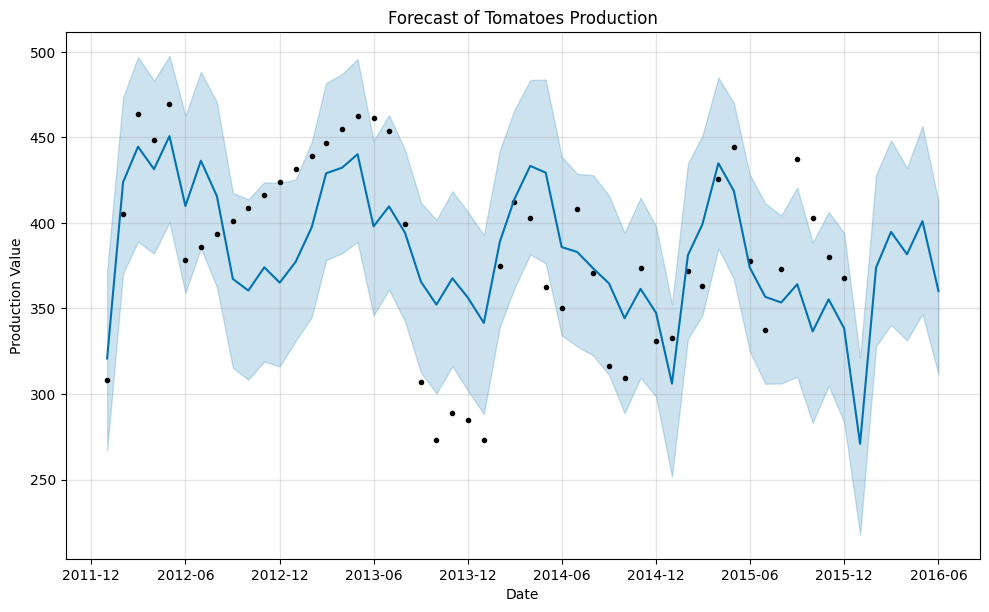

In [100]:
import matplotlib.pyplot as plt

# Plot the forecast using Prophet's default plotting function
model.plot(forecast)
plt.title(f'Forecast of {good_to_forecast} Production')
plt.xlabel('Date')
plt.ylabel('Production Value')
plt.show()


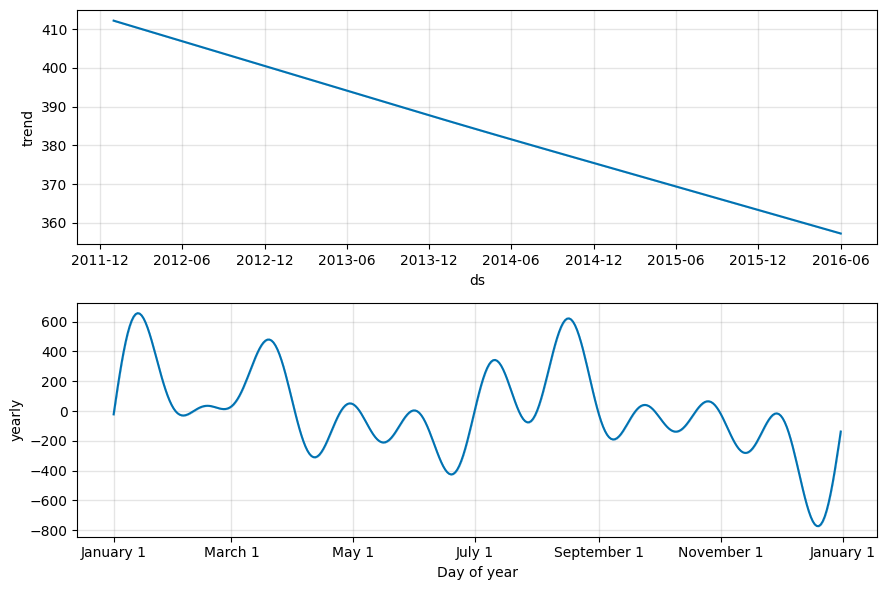

In [101]:
# Plot the forecast components (trend, yearly seasonality, etc.)
model.plot_components(forecast)
plt.show()


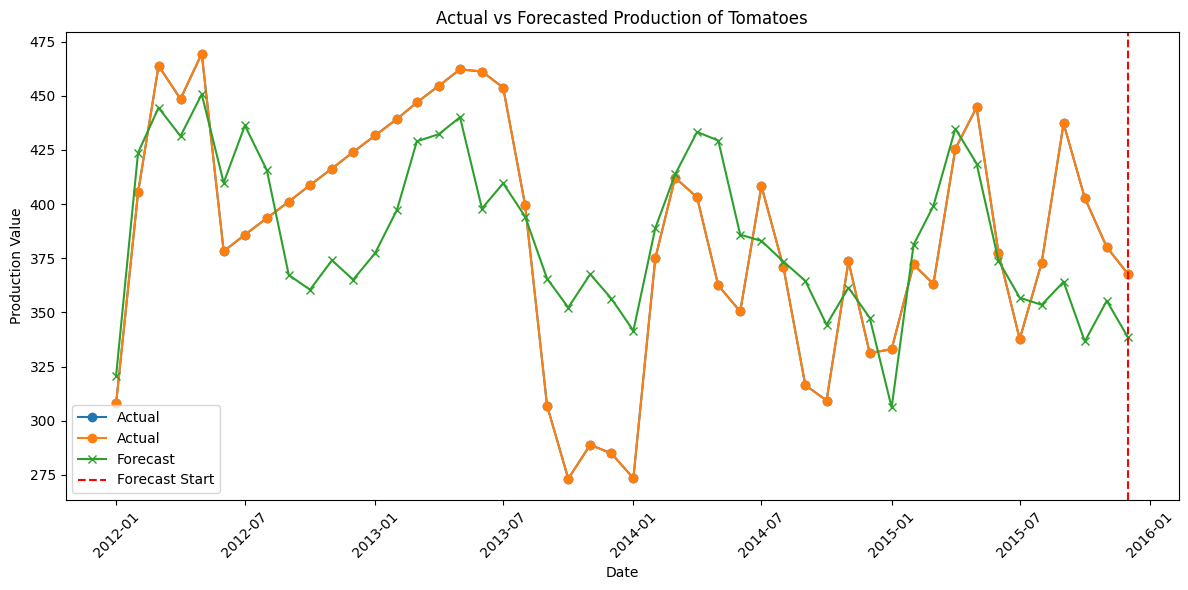

In [104]:
# Merge actual data with forecast
df_merged = pd.merge(df_prophet, forecast[['ds', 'yhat']], on='ds', how='left')

# Plot actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df_merged['ds'], df_merged['y'], label='Actual', marker='o')
plt.plot(df_merged['ds'], df_merged['yhat'], label='Forecast', marker='x')
plt.axvline(x=df_prophet['ds'].max(), color='r', linestyle='--', label='Forecast Start')
plt.title(f'Actual vs Forecasted Production of {good_to_forecast}')
plt.xlabel('Date')
plt.ylabel('Production Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
